In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial, reduce
import numpy.polynomial.polynomial as poly
import copy
from tqdm import tqdm

In [ ]:
def CriticalPoints(f):
    #This function computes the critical points of the polynomial f
    fprime = poly.polyder(f)
    return poly.polyroots(fprime)

In [ ]:
def CriticalValues(a,b):
    #This function computes the critical values
    f = (-b,1-a,b,a)
    [c1, c2] = CriticalPoints(f)
    
    v1 = poly.polyval(c1,f)
    v2 = poly.polyval(c2,f)
    if v1 > 1:
        v1 = 1
    elif v1 < -1:
        v1 = -1
    if v2 > 1:
        v2 = 1
    elif v2 < -1:
        v2 = -1
    
    return [v1, v2]

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\Noah Cockram\AppData\Local\Temp\ipykernel_22904\817428292.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  FirstAs[na] = c[0]
100%|██████████| 100/100 [00:01<00:00, 60.02it/s]
C:\Users\Noah Cockram\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


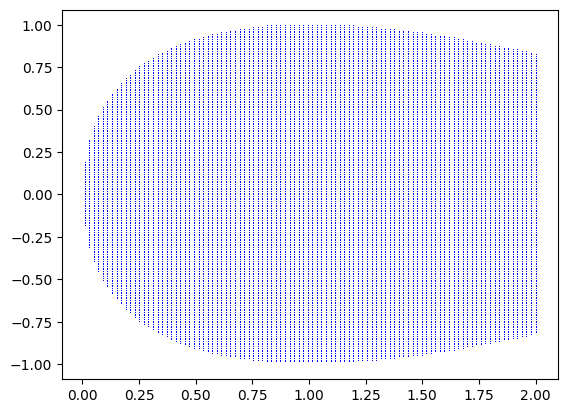

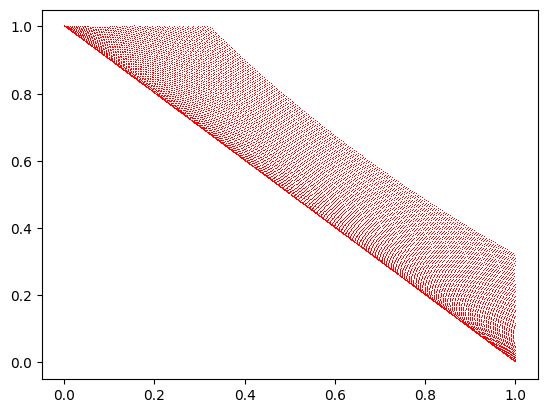

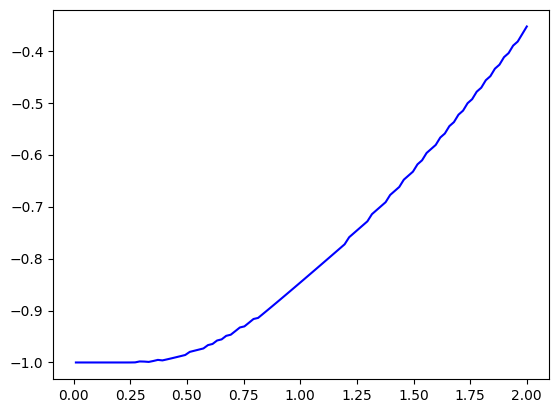

In [ ]:
#Here we plot the parameter space of cubics

L = np.linspace(0.01,2,100)
A = []
FirstAs = np.zeros(len(L))
for na, a in enumerate(tqdm(L)):
    maxb = 2*np.sqrt(a)-a
    B = np.linspace(-1,1,200)
    B = [x for x in B if abs(x) < maxb]
    
    Bmat = [[a,x] for x in B]
    if na == 0:
        vec = Bmat
    else:
        vec = vec + Bmat
        #print(len(vec),len(vec[0]))
    for nb, b in enumerate(B):
        c = np.asarray(CriticalValues(a,b))
        folf = 0
        if folf == 0:
            FirstAs[na] = c[0]
        if A == []:
            A = [c]
            folf += 1
        else:
            A = A + [c]
            folf += 1

vecx = [x for [x,y] in vec]
vecy = [y for [x,y] in vec]
A1 = [[(x+1)/2,(1-y)/2] for [x,y] in A]
X = [x for [x,y] in A1]
Y = [y for [x,y] in A1]
plt.plot(vecx,vecy,',b')
plt.figure()
plt.plot(X,Y,',r')
plt.figure()
plt.plot(L,FirstAs,'b')

In [ ]:
def round_sig(x, sig=2):
    #This function rounds a decimal to a number of significant digits
    if abs(x) < 1e-8:
        return 0
    return round(x, sig-int(np.floor(np.log(abs(x))/np.log(10)))-1)

In [ ]:
def CubicOrbit(x,f,N):
    #This function computes the first N iterates of a cubic polynomial f at the point x.  Here, we round to 5 significant digits
    O = []
    if x > 1:
        x = int(1)
    elif x < -1:
        x = int(-1)
    O += [round_sig(x,5)]
    for n in range(1,N):
        O += [round_sig(poly.polyval(O[n-1],f),5)]
    return O

In [ ]:
def SawtoothOrbit(x,f,N):
    #This computes the first N iterates of a sawtooth map f at a point x, again rounded to 5 significant digits
    O = []
    if x > 1:
        x = int(1)
    elif x < -1:
        x = int(-1)
    O += [round_sig(x,5)]
    for n in range(1,N):
        O += [round_sig(f(O[n-1]),5)]
    return O

In [ ]:
def CubicItinerary(x,f,c1,c2,N):
    #This function computes the itinerary of a cubic polynomial f at x
    O = CubicOrbit(x,f,N)
    I = []
    
    for n in range(N):
        close_to_c1 = abs(O[n]-c1) < 1e-8
        close_to_c2 = abs(O[n]-c2) < 1e-8
        if O[n] < c1 and not close_to_c1:
            I += ['I1']
        elif close_to_c1:
            I += ['C1']
        elif O[n] < c2 and not close_to_c2:
            I += ['I2']
        elif close_to_c2:
            I += ['C2']
        elif O[n] > c2:
            I += ['I3']
        else:
            print('Itinerary failed:',O[n],I,c1,c2)
    return I

In [ ]:
def SawtoothItinerary(x,f,c1,c2,N):
    #This function computes the itinerary of a sawtooth map at x
    O = SawtoothOrbit(x,f,N)
    I = []
    
    for n in range(N):
        close_to_c1 = abs(O[n]-c1) < 1e-8
        close_to_c2 = abs(O[n]-c2) < 1e-8
        if O[n] < c1 and not close_to_c1:
            I += ['I1']
        elif close_to_c1:
            I += ['C1']
        elif O[n] < c2 and not close_to_c2:
            I += ['I2']
        elif close_to_c2:
            I += ['C2']
        elif O[n] > c2:
            I += ['I3']
        else:
            print('Itinerary failed:',O[n],I,c1,c2)
    return I

In [ ]:
def CubicKneadingData(f,N):
    #This function computes the kneading data of a cubic polynomial
    [c1, c2] = CriticalPoints(f)
    c1 = round_sig(c1,5)
    c2 = round_sig(c2,5)
    #print(c1,c2)      #<<<--------
    K1 = CubicItinerary(poly.polyval(c1,f),f,c1,c2,N)
    K2 = CubicItinerary(poly.polyval(c2,f),f,c1,c2,N)
    
    return K1, K2

In [ ]:
def Sawtooth(x,m,c1):
    #This is a sawtooth map
    c2 = round_sig(c1 + 1 - 1/m,5)
    if x <= c1:
        return m*(x + 1) - 1
    elif x <= c2:
        return -m*(x - c1) + m*(c1 + 1) - 1
    else:
        return m*(x - 1) + 1

In [ ]:
def SawtoothKneadingData(m,c1,N):
    #This function computes the kneading data of a sawtooth map
    c2 = round_sig(c1 + 1 - 1/m,5)
    
    K1 = SawtoothItinerary(Sawtooth(c1, m, c1),partial(Sawtooth, m = m, c1 = c1),c1,c2,N)
    K2 = SawtoothItinerary(Sawtooth(c2, m, c1),partial(Sawtooth, m = m, c1 = c1),c1,c2,N)
    #print(K1,K2)     #<<<<-------
    #print('m,c1,c2:',m,c1,c2)   #<<<<-------
    return K1, K2

In page 18 of Milnor and Tresser, he tells us that Misiurewicz and Szlenk, as well as Rothschild proved that
$$
h(f) = \lim_{n \rightarrow \infty}\frac{1}{n}\log \ell(f^n),
$$
from which it follows that, if $f$ is $m$-modal, then
$$
h(f) \leq \log \ell(f) = \log(m + 1).
$$
Hence, for all cubic maps $f: I \rightarrow I$, we have that $h(f) \in [0,\log 3]$.  Additionally, for all sawtooth maps $S: I \rightarrow I$, we have $h(S) \in [0, \log 3]$.

In [ ]:
#These functions compute signs based on itineraries, which are used as in Block & Keesling 1989
def letterSign(A, shape):
    if A == 'I1' or A == 'I3':
        return shape
    elif A == 'C1' or A == 'C2':
        return 0
    elif A == 'I2':
        return -shape

def itSign(I, shape):
    return [letterSign(x, shape) for x in I]

def letterOrder(A,B):
    if A == B:
        return 0
    elif A == 'I1' or (A == 'C1' and (B == 'I2' or B == 'C2' or B == 'I3')) or (A == 'I2' and (B == 'C2' or B == 'I3')) or (A == 'C2' and B == 'I3'):
        return -1
    else:
        return 1

def itineraryOrder(I1,I2, shape):
    #print(I1,I2)     #<<<---------
    if I1 == I2:
        return 0
    
    k = 0
    while I1[k] == I2[k] and k < len(I1):
        k += 1
        
    if k == 0:
        #print(I1[0],I2[0])        #<<<<----------
        return letterOrder(I1[0],I2[0])
    
    S = itSign(I1[:k], shape)
    #print(S)       #<<<<<------
    
    multiSign = reduce(lambda a,b : a*b, S[0:k-1], 1) #First element of itSign will be 0 on the critical d'itineraries, so we omit it.
    #print(multiSign)    #<<<------
    #print('letter order and multi sign:',letterOrder(I1[k],I2[k]), multiSign) #<<<-------
    return letterOrder(I1[k],I2[k])*multiSign
        

In [ ]:
def MapComparability(kS1,kS2,kf1,kf2,shape):
    #This function determines whether sawtooth maps and cubics are comparable in terms of kneading data -- essentially whether the sawtooth maps given are a good enough model for the cubics
    Knead1 = itineraryOrder(kS1,kf1, shape)
    Knead2 = itineraryOrder(kS2,kf2, shape)
    
    if (Knead1 == -shape or Knead1 == 0) and (Knead2 == shape or Knead2 == 0):
        return 'K(S) <= K(f)'
    elif (Knead1 == shape or Knead1 == 0) and (Knead2 == -shape or Knead2 == 0):
        return 'K(S) >= K(f)'
    elif Knead1 == -shape:
        return 'Better lower bound'
    elif Knead1 == shape:
        return 'Better upper bound'

In [ ]:
def FindComparableMap(a,b,m,N):
    #This function finds a comparable map to a given cubic
    f = (-b,1-a,b,a)
    shape = int(abs(a)/a)
    Kf1, Kf2 = CubicKneadingData(f, N)
    L = -1/m
    KS1L, KS2L = SawtoothKneadingData(m, L, N)
    Lcomp = MapComparability(KS1L, KS2L, Kf1, Kf2, shape)

    if Lcomp == 'K(S) <= K(f)':
        return L, 'K(S) <= K(f)'
    elif Lcomp == 'K(S) >= K(f)':
        return L, 'K(S) >= K(f)'
    
    R = 2/m - 1
    KS1R, KS2R = SawtoothKneadingData(m, R, N)
    Rcomp = MapComparability(KS1R, KS2R, Kf1, Kf2, shape)

    if Rcomp == 'K(S) <= K(f)':
        return R, 'K(S) <= K(f)'
    elif Rcomp == 'K(S) >= K(f)':
        return R, 'K(S) >= K(f)'
    
    while abs(R - L) >= 1e-17:
        M = L + (R - L)/2
        KS1, KS2 = SawtoothKneadingData(m, M, N)
        Mcomp = MapComparability(KS1, KS2, Kf1, Kf2, shape)

        if Mcomp == 'K(S) <= K(f)':
            return M, 'K(S) <= K(f)'
        elif Mcomp == 'K(S) >= K(f)':
            return M, 'K(S) >= K(f)'
        elif Mcomp == 'Better lower bound':
            L = copy.copy(M)
        elif Mcomp == 'Better upper bound':
            R = copy.copy(M)
        
        if L > R:
            return 'failed: R > L'
    
    return M, 'Fail'

In [ ]:
def TopologicalEntropy(a,b):
    #This function computes the topological entropy of a given cubic polynomial
    N = 50
    h0 = 1
    h1 = 2.95

    while abs(h1 - h0) >= 1e-3:
        h = (h0 + h1)/2

        M, G = FindComparableMap(a,b,h,N)

        if G == 'K(S) <= K(f)':
            h0 = copy.copy(h)
        elif G == 'K(S) >= K(f)':
            h1 = copy.copy(h)
        elif G == 'Fail':
            print('Entropy failed:',a,b,h)
            return M, 'Fail'
    
    return float(h0), float(h1)

In [ ]:
def DrawEntropy(shape, Precision = 100):
    #This function plots the isentrope of cubics within the parameter space.
    L = np.linspace(1,4,Precision + 1)

    A = []
    Z = []
    
    for na, a in enumerate(tqdm(L)):
        maxb = 2*np.sqrt(a)-a
        B = np.linspace(-1,1,Precision+1)
        MAXB = abs(B) <= maxb
        B = B[MAXB]
        Bmat = [[a,x] for x in B]
        if na == 0:
            vec = Bmat
        else:
            vec = vec + Bmat
        for _, b in enumerate(B):
            z = np.log(sum(TopologicalEntropy(a,b))/2)
            c = np.asarray(CriticalValues(a,b))
            if A == []:
                A = np.array([[c[0],c[1],z]])
            else:
                A = np.append(A,[[c[0],c[1],z]],axis = 0)

    vec = np.asarray(vec)
    vec1 = vec[:,0]
    vec2 = vec[:,1]
    if shape == 1:
        A1 = np.array([[(float(x)+1)/2,(1-float(y))/2,z] for [x,y,z] in A])
    elif shape == -1:
        A1 = np.array([[(1-float(x))/2,(float(y)+1)/2,z] for [x,y,z] in A])
    X = list(A1[:,0])
    Y = list(A1[:,1])
    Z = list(A1[:,2])
    #print(len(X),len(Y),len(Z))   #<<<-----
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14,7))
    ax1.tricontour(X,Y,Z)
    ax2.tricontour(vec1,vec2,Z)

In [27]:
P = 100
shape = 1
DrawEntropy(shape, Precision = P)

  0%|          | 0/101 [00:00<?, ?it/s]C:\Users\Noah Cockram\AppData\Local\Temp\ipykernel_22904\2892310680.py:22: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if A == []:
 27%|██▋       | 27/101 [01:51<05:05,  4.13s/it]


KeyboardInterrupt: 